In [1]:
# Import Neccessary Lib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

C:\Users\us953\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# reading test csv file.
test_df = pd.read_csv('Data_Test.csv')
final_predicted_data = test_df.copy()

In [3]:
# reading train csv file
df = pd.read_csv('Data_Train.csv')
df

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


# Exploratory Data Analysis

In [4]:
# getting size of data set.
df.shape

(12690, 9)

##### This dataset contains 12690 rows and 9 columns, out of which one column represents the target variable and the remaining eleven columns are independent variables.

In [5]:
# list of columns.
df.columns

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES', 'COST'],
      dtype='object')

In [6]:
#Investigating the entire dataset first
df.duplicated().sum()

25

In [7]:
df= df.drop_duplicates()

In [8]:
# dropping unused columns.
df.drop(['RESTAURANT_ID', 'TIME'], axis=1, inplace=True)
test_df.drop(['RESTAURANT_ID', 'TIME'], axis=1, inplace=True)

In [9]:
df

,TITLE,CUISINES,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,"Malwani, Goan, North Indian",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR","Asian, Modern Indian, Japanese",Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,"North Indian, Chinese, Biryani, Hyderabadi",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,"Tibetan, Chinese",Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,Desserts,Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...
12685,QUICK BITES,"North Indian, Burger, Kebab",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR","Goan, Continental",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,"Finger Food, Continental, Asian, Chinese",Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,"North Indian, South Indian, Chinese, Street Food",Chennai,Maduravoyal,3.5,32 votes,400


In [10]:
# getting NEW value, need to convert it.
df[df['RATING'] == 'NEW'] 

,TITLE,CUISINES,CITY,LOCALITY,RATING,VOTES,COST
62,QUICK BITES,"North Indian, Beverages",Kochi,Kalamassery,NEW,NaN,200
69,NaN,"Pizza, Fast Food",New Delhi,Kalkaji,NEW,NaN,200
111,CASUAL DINING,"Gujarati, Rajasthani, North Indian",Mumbai,Borivali West,NEW,NaN,800
117,QUICK BITES,"North Indian, Chinese",New Delhi,Dwarka,NEW,NaN,500
120,QUICK BITES,"North Indian, South Indian",Bangalore-560066,Whitefield,NEW,NaN,150
...,...,...,...,...,...,...,...
12602,QUICK BITES,"Rolls, North Indian, Biryani",Mumbai,Mahakali,NEW,NaN,200
12613,CASUAL DINING,"Asian, Thai, Sushi, Healthy Food",Gurgaon,DLF Phase 4,NEW,NaN,950
12630,CASUAL DINING,"Tex-Mex, Italian, Coffee",Gurgaon,Golf Course Road,NEW,NaN,1200
12658,NaN,"Kerala, South Indian",Kochi,Chittoor Road,NEW,NaN,400


In [11]:
# Removing text from the 'votes' column
df['VOTES'] = df['VOTES'].str.extract('(\d+)').astype(float)
test_df['VOTES'] = test_df['VOTES'].str.extract('(\d+)').astype(float)

In [12]:
# Replacing New with NaN.
df.replace('NEW', np.NaN, inplace=True)
test_df.replace('NEW', np.NaN, inplace=True)

In [13]:
# checking null values.
df.isna().sum()

TITLE       1000
CUISINES       0
CITY         112
LOCALITY      98
RATING       706
VOTES       1200
COST           0
dtype: int64

In [14]:
# Checking the types.
df.dtypes

TITLE        object
CUISINES     object
CITY         object
LOCALITY     object
RATING       object
VOTES       float64
COST          int64
dtype: object

In [15]:
# sum of - values.
(df['RATING'] == '-').sum()

494

In [16]:
# Replacing the - from NaN
df['RATING'].replace('-', np.NAN, inplace=True)

In [17]:
# againg checking.
(df['RATING'] == '-').sum()

0

In [18]:
# checking NaN for all the columns.
df.isna().sum()

TITLE       1000
CUISINES       0
CITY         112
LOCALITY      98
RATING      1200
VOTES       1200
COST           0
dtype: int64

In [19]:
#  Fill NaN values with mode for each column that has NaN values
for col in df.columns:
    if df[col].isnull().any():
        df[col] = df[col].fillna(df[col].mode().iloc[0])

In [20]:
# removing all the null values.
df.isna().sum()

TITLE       0
CUISINES    0
CITY        0
LOCALITY    0
RATING      0
VOTES       0
COST        0
dtype: int64

In [21]:
# Data exploration for CITY
# CITY has 147 null values
#combining City and locality
df['Location']=df['CITY']+' '+df['LOCALITY']
df.drop(columns=['CITY','LOCALITY'])

test_df['Location']=test_df['CITY']+' '+test_df['LOCALITY']
test_df.drop(columns=['CITY','LOCALITY'], inplace=True)

In [22]:
df.dropna(subset=['Location'],inplace=True)

In [23]:
# !pip install fuzzywuzzy
from fuzzywuzzy import process
 
names_array=[]
def match_names(wrong_names,correct_names):
    for row in wrong_names:
        x=process.extractOne(row, correct_names)
        if x[1]<60:
            names_array.append('Others')
        else:
            names_array.append(x[0])
    return names_array
  
#Wrong country names dataset

correct_names=['Bangalore','Thane',
'Hyderabad','Andheri',
'Delhi', 'Kerala',
'Chennai', 'Bandra',
'Mumbai', 'Telangana',
'Kochi', 
'Noida', 
'Gurgaon', 'Ernakulam',
'Faridabad', 'Ghaziabad',
'Secunderabad' ]
name_match=match_names(df.Location,correct_names)    

print(len(names_array))
df['Location']=names_array

12665


In [25]:
# getting first 100 rows.
df.head(100)

,TITLE,CUISINES,RATING,VOTES,COST,Location
0,CASUAL DINING,"Malwani, Goan, North Indian",3.6,49.0,1200,Thane
1,"CASUAL DINING,BAR","Asian, Modern Indian, Japanese",4.2,30.0,1500,Chennai
2,CASUAL DINING,"North Indian, Chinese, Biryani, Hyderabadi",3.8,221.0,800,Chennai
3,QUICK BITES,"Tibetan, Chinese",4.1,24.0,800,Bandra
4,DESSERT PARLOR,Desserts,3.8,165.0,300,Mumbai
...,...,...,...,...,...,...
95,CAFÉ,"Cafe, Healthy Food",4.2,148.0,500,Hyderabad
96,CASUAL DINING,"Fast Food, Mexican, North Indian, Chinese",3.8,221.0,700,Chennai
97,CASUAL DINING,"North Indian, Iranian",3.9,228.0,950,Bangalore
98,QUICK BITES,"Biryani, Kebab",3.8,302.0,400,Bangalore


<Axes: >

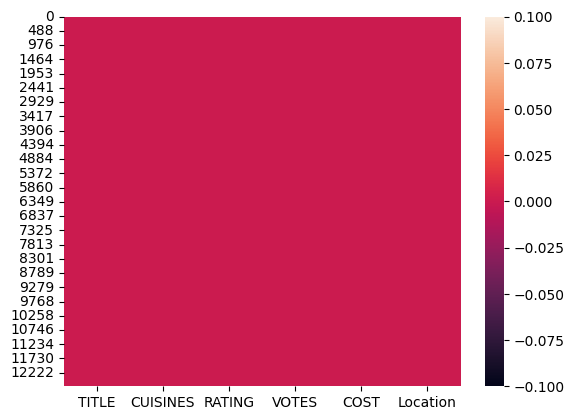

In [26]:
# Representation with heatmap.
sns.heatmap(df.isnull())

In [27]:
# Checking the types.
df.dtypes

TITLE        object
CUISINES     object
RATING       object
VOTES       float64
COST          int64
Location     object
dtype: object

In [28]:
# changing the type of RATING.
df['RATING'] = df['RATING'].astype(float)

In [29]:
# again Checking the types.
df.dtypes

TITLE        object
CUISINES     object
RATING      float64
VOTES       float64
COST          int64
Location     object
dtype: object

In [30]:
# getting summary description of dataset.
df.describe()

,RATING,VOTES,COST
count,12665.000000,12665.000000,12665.000000
mean,3.796123,380.411607,655.400790
std,0.403185,809.716694,627.389831
min,2.000000,4.000000,20.000000
25%,3.600000,44.000000,300.000000
50%,3.900000,132.000000,500.000000
75%,4.000000,405.000000,800.000000
max,4.900000,41186.000000,14000.000000


#### Count indicates the number of non-null values present in each column. When the mean is greater than the median (50th percentile) in a column, it shows right skewness, indicating a positively skewed distribution. Conversely, when the mean is less than the median in a column, it shows left skewness, indicating a negatively skewed distribution. Thus, if some columns have means greater than their medians and others have means less than their medians, it suggests that the dataset contains both positively and negatively skewed distributions. Let's examine this step by step.
#### Also outliers are presents in this data set.

In [31]:
# We have noticed that in dataset the columns are in categorial type.
# Encoding categorial columns using OrdinalEncodes.

In [32]:
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = OE.fit_transform(df[i].values.reshape(-1,1))


# For testing Data.
for i in test_df.columns:
    if test_df[i].dtype == 'object':
        test_df[i] = OE.fit_transform(test_df[i].values.reshape(-1,1))

#### Checking outliers

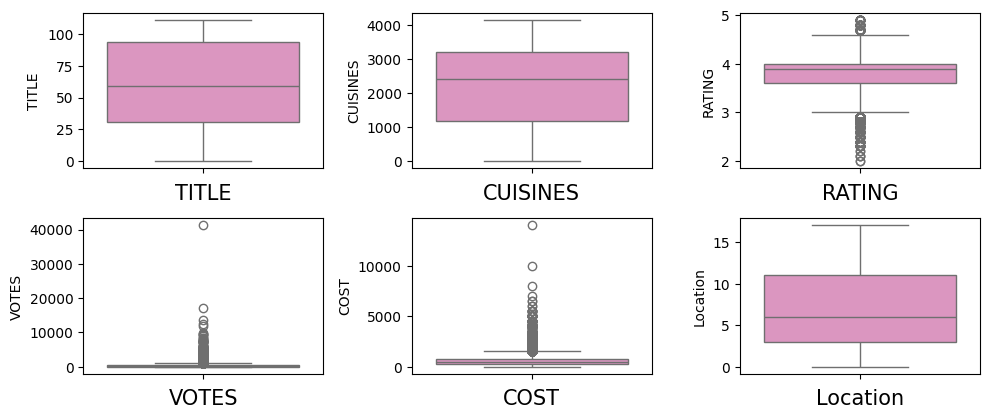

In [33]:
# Before removing outliers.
plt.figure(figsize=(10,6), facecolor='White')
plotnumber = 1
for col in df.columns:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(df[col], palette='Set2_r')
        plt.xlabel(col, fontsize= 15)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [34]:
# As we can see, there are outliers present in the dataset columns named "rating", "Votes" and "cost".

In [35]:
# Removing outliers
from scipy import stats

# Columns to handle outliers
columns_to_filter = ['RATING', 'COST', 'VOTES']

for col in columns_to_filter:
    # Calculate the Z-scores
    z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())

    # Define a threshold
    threshold = 3

    # Remove outliers
    df = df[z_scores < threshold]

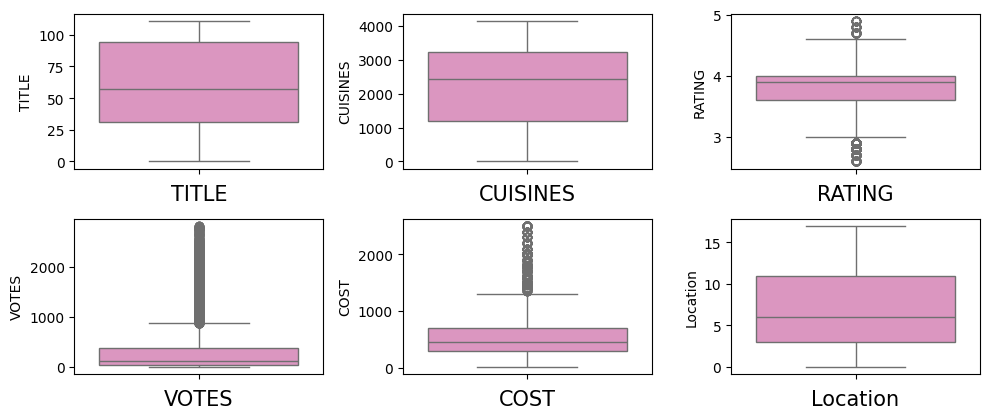

In [36]:
# After removing outliers.
plt.figure(figsize=(10,6), facecolor='White')
plotnumber = 1
for col in df.columns:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(df[col], palette='Set2_r')
        plt.xlabel(col, fontsize= 15)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [37]:
# After removing the possible outliers we can see total number are reduced.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12177 entries, 0 to 12689
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   TITLE     12177 non-null  float64
 1   CUISINES  12177 non-null  float64
 2   RATING    12177 non-null  float64
 3   VOTES     12177 non-null  float64
 4   COST      12177 non-null  int64  
 5   Location  12177 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 665.9 KB


In [38]:
# After removing the possible outliers we can see total number are reduced.
df.describe()

,TITLE,CUISINES,RATING,VOTES,COST,Location
count,12177.000000,12177.000000,12177.000000,12177.000000,12177.000000,12177.000000
mean,59.926829,2233.524267,3.789070,308.542416,591.332102,6.868933
std,33.195757,1208.477507,0.386021,445.051387,445.891734,4.427998
min,0.000000,0.000000,2.600000,4.000000,20.000000,0.000000
25%,31.000000,1181.000000,3.600000,44.000000,300.000000,3.000000
50%,57.000000,2428.000000,3.900000,123.000000,450.000000,6.000000
75%,94.000000,3235.000000,4.000000,374.000000,700.000000,11.000000
max,111.000000,4154.000000,4.900000,2811.000000,2500.000000,17.000000


### checking skewness

In [39]:
df.skew()

TITLE      -0.094345
CUISINES   -0.213732
RATING     -0.510043
VOTES       2.607249
COST        1.821688
Location    0.290510
dtype: float64

In [40]:
# Skewness are present in this data.

### Checking visualization presentation

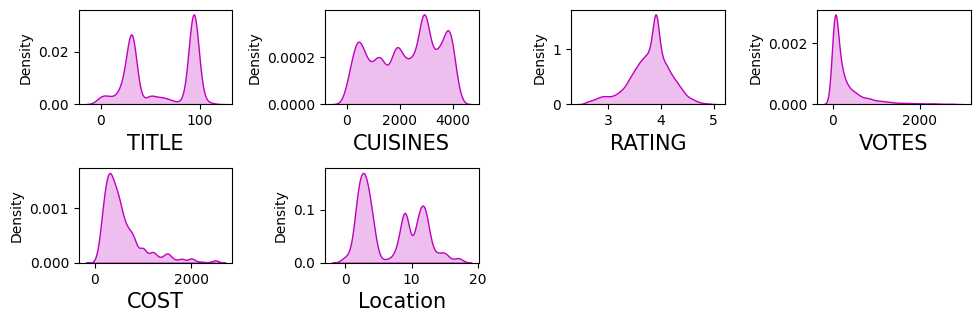

In [41]:
plt.figure(figsize=(10,6), facecolor='White')
plotnumber = 1
for col in df.columns:
    if plotnumber <=8:
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(df[col], color='m', kde_kws={'shade' : True}, hist=False)
        plt.xlabel(col, fontsize= 15)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.tight_layout()

##### Removing Skewness

In [42]:
# Removing the skewness by using Cube root square.
df['VOTES'] = np.cbrt(df['VOTES'])

# Removing the skewness by using Cube root square.
df['COST'] = np.cbrt(df['COST'])

In [43]:
# After removing the skewness.
df.skew()

TITLE      -0.094345
CUISINES   -0.213732
RATING     -0.510043
VOTES       0.916684
COST        0.748053
Location    0.290510
dtype: float64

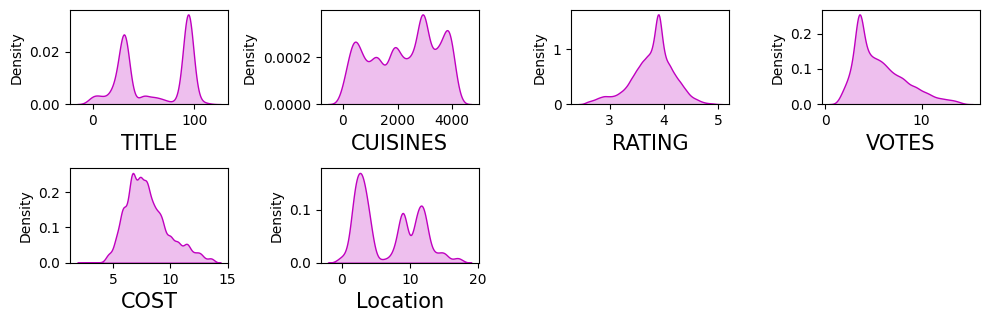

In [44]:
# Again checking.
plt.figure(figsize=(10,6), facecolor='White')
plotnumber = 1
for col in df.columns:
    if plotnumber <=8:
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(df[col], color='m', kde_kws={'shade' : True}, hist=False)
        plt.xlabel(col, fontsize= 15)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [45]:
# Now Correlation between target variable and independent variable.
cor = df.corr()
cor

,TITLE,CUISINES,RATING,VOTES,COST,Location
TITLE,1.000000,0.247140,-0.146594,-0.207772,-0.409314,-0.061263
CUISINES,0.247140,1.000000,-0.063536,-0.022913,-0.048165,0.012732
RATING,-0.146594,-0.063536,1.000000,0.486531,0.304597,-0.060754
VOTES,-0.207772,-0.022913,0.486531,1.000000,0.449401,-0.004182
COST,-0.409314,-0.048165,0.304597,0.449401,1.000000,-0.027761
Location,-0.061263,0.012732,-0.060754,-0.004182,-0.027761,1.000000


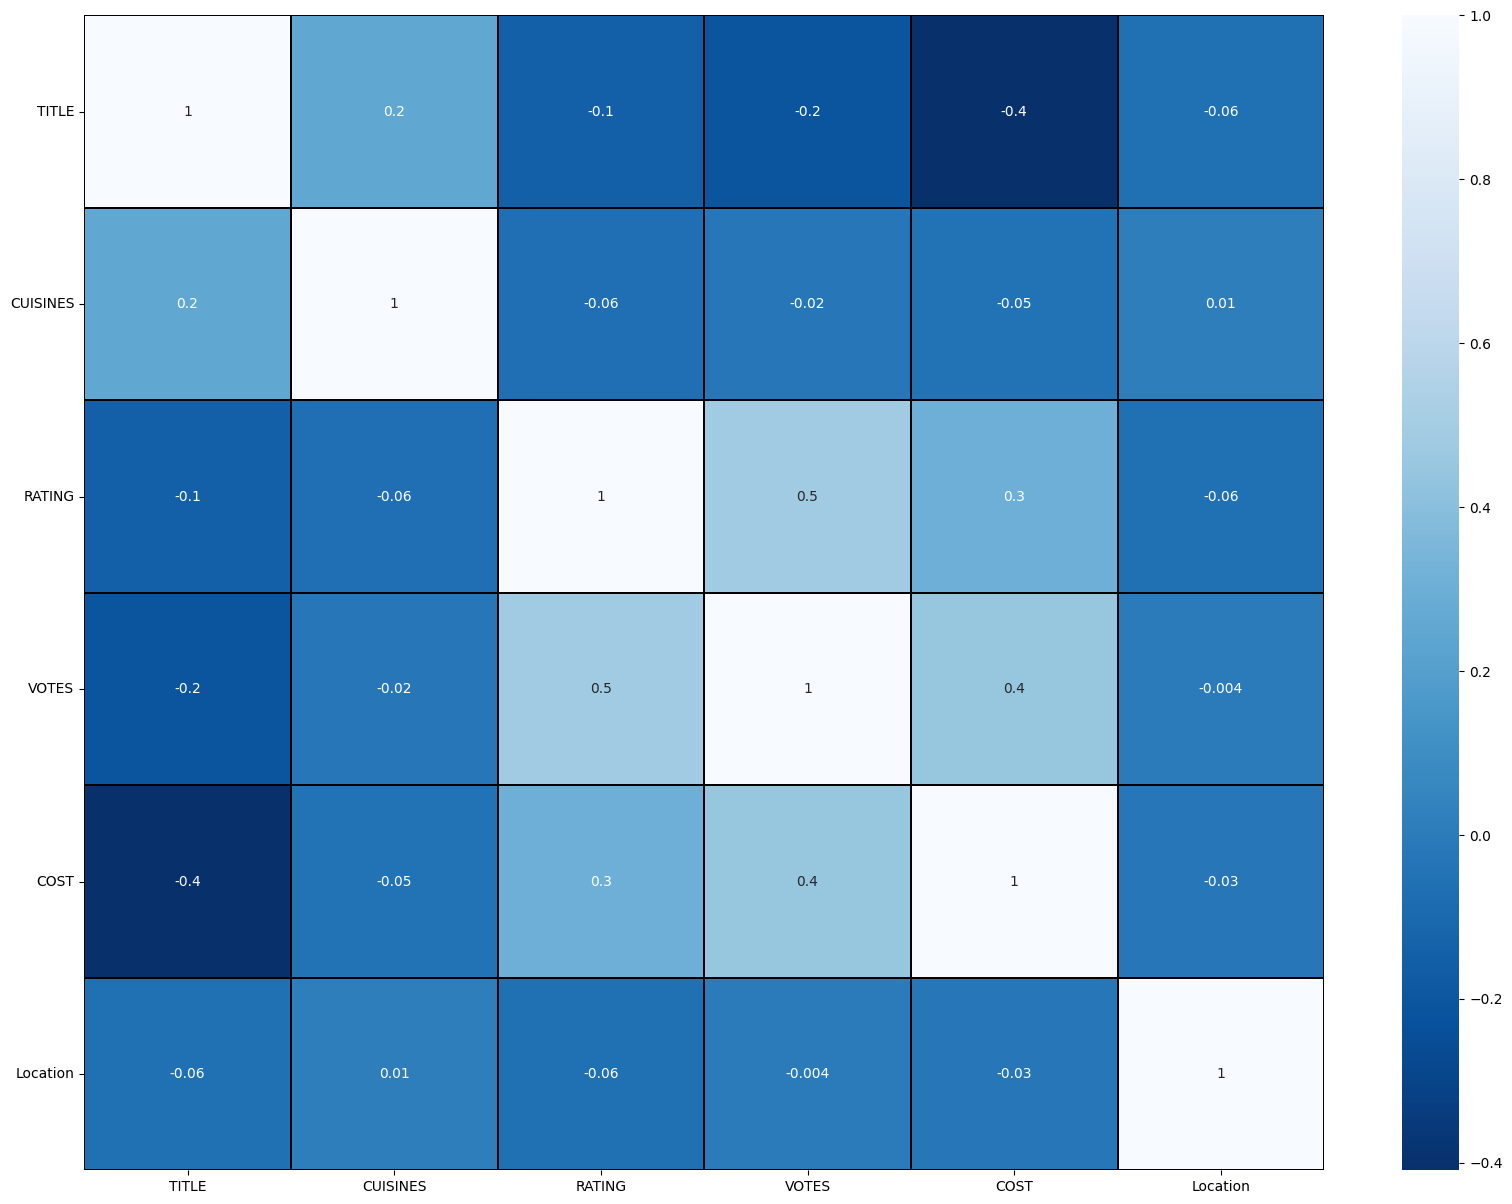

In [46]:
# Visualizing the correlation matrix by plotting heatmap
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), linewidths=0.1, fmt=".1g", linecolor="black",annot=True,cmap="Blues_r")
plt.yticks(rotation = 0)

plt.show()

#### When two independent features are highly correlated, we can drop one of the columns.

In [47]:
# We can clearly see that there is no positive correlation with the target value,
# but there is a highly negative correlation with the target value.
cor['COST'].sort_values(ascending=False)

COST        1.000000
VOTES       0.449401
RATING      0.304597
Location   -0.027761
CUISINES   -0.048165
TITLE      -0.409314
Name: COST, dtype: float64

In [48]:
# The titles are highly correlated.

In [49]:
# Separating feature and label
x = df.drop('COST', axis=1)
y = df['COST']

In [50]:
# Feature Scaling using Standard Scalarization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [51]:
# Checking Variance Inflation Factor(VIF)
# Checking VIF values to confirm whether multicollinearity exists or not.
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF Values'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif['Feture Values'] = x.columns

In [52]:
vif
# So, we can clearly see that there is no multicollinearity present, so we don't need to drop any columns.

,VIF Values,Feture Values
0,1.121035,TITLE
1,1.069234,CUISINES
2,1.323324,RATING
3,1.347267,VOTES
4,1.009816,Location


## Modelling

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [54]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=.2, shuffle=True)

# Random Forest Regressor

In [55]:
m=RandomForestRegressor()
m.fit(x_train, y_train)

RandomForestRegressor()

In [56]:
y_pred=m.predict(x_test)
mean_squared_error(y_test,y_pred)

1.137103721744228

In [57]:
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 0.8064104973670294


In [58]:
r2_score(y_test,y_pred)

0.6885833098976331

# Linear Regression

In [59]:
m=LinearRegression()
m.fit(x_train, y_train)
y_pred=m.predict(x_train)
mean_squared_error(y_train,y_pred)

2.28260975221964

In [60]:
y_pred=m.predict(x_test)
mean_squared_error(y_test,y_pred)

2.394757888745715

In [61]:
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 1.1648570107610259


In [62]:
r2_score(y_test,y_pred)

0.34415167143611647

# SVR

In [63]:
from sklearn.svm import SVR
m=SVR()
m.fit(x_train, y_train)
y_pred=m.predict(x_train)
mean_squared_error(y_train,y_pred)

1.8912567455523712

In [64]:
y_pred=m.predict(x_test)
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 1.037439050302318


In [65]:
r2_score(y_test,y_pred)

0.4444689525559924

# KNeighbors Regressor

In [66]:
from sklearn.neighbors import KNeighborsRegressor
m=KNeighborsRegressor()
m.fit(x_train, y_train)
y_pred=m.predict(x_train)
mean_squared_error(y_train,y_pred)

1.2237404924922641

In [67]:
y_pred=m.predict(x_test)
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 1.016431029917622


In [68]:
r2_score(y_test,y_pred)

0.4732270198710785

In [69]:
random_grid =  {'max_depth': [20, 60, 100, None],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5],
 'n_estimators': [20, 50, 100, 200]}

In [70]:
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(x_train, y_train)

rf_random.best_params_

best_random = rf_random.best_estimator_
y_pred=best_random.predict(x_test)
print("MAE",mean_absolute_error(y_test,y_pred))

Fitting 3 folds for each of 96 candidates, totalling 288 fits
MAE 0.7904051307168931


In [72]:
r2_score(y_test,y_pred)

0.7003916810021086

In [73]:
# Predict on the test data
test_predictions = best_random.predict(test_df)

In [82]:
# Create a DataFrame for the predictions
output = final_predicted_data.copy()
output['COST'] = test_predictions*100

# Save the predictions to a CSV file
output.to_csv('restaurant_cost_predictions.csv', index=False)